In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
client_data = pd.read_csv('client_data.csv')
price_data = pd.read_csv('price_data.csv')

Exploratory data analysis

In [27]:
client_data.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [28]:
price_data.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [29]:
client_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [30]:
# check if a specific column is in datetime format
print(isinstance(client_data['date_end'], pd.core.dtypes.dtypes.DatetimeTZDtype))

False


In [31]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [32]:
# statistics of the numerical variables in the client_data dataset.
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


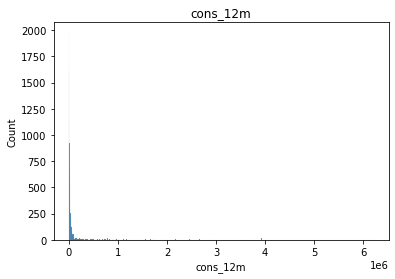

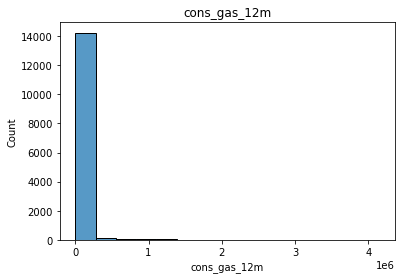

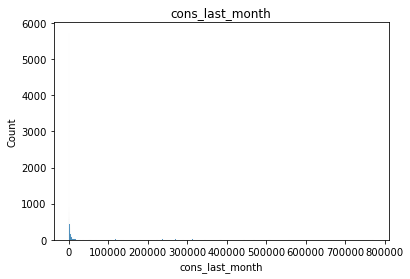

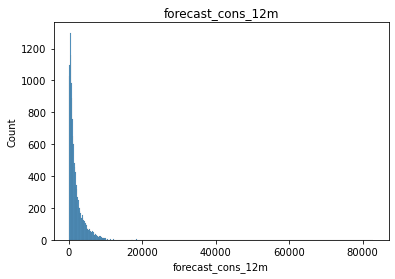

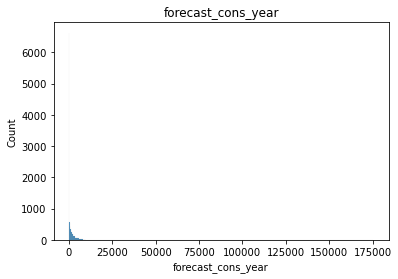

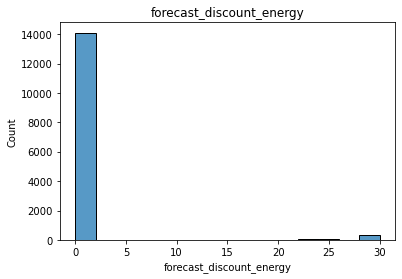

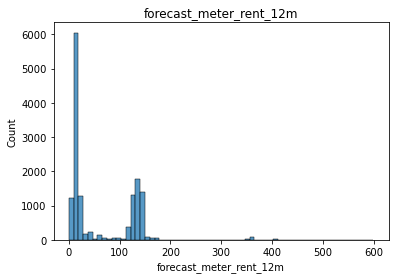

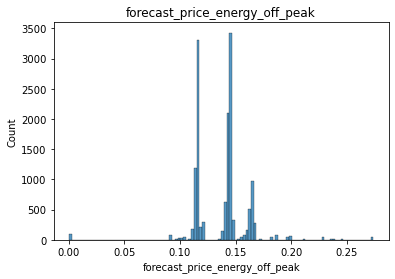

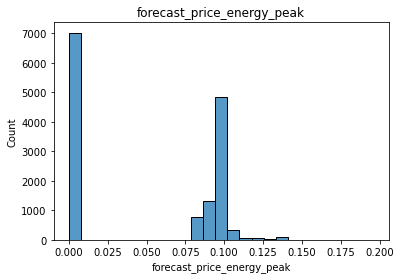

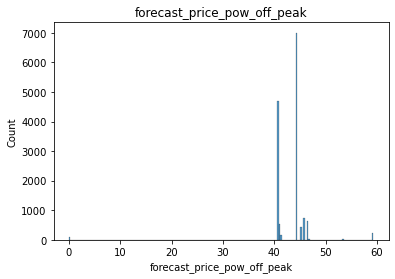

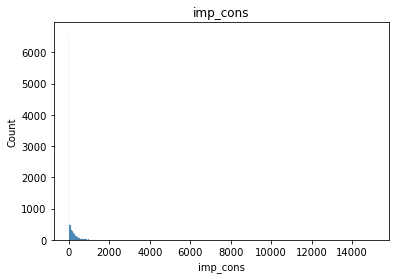

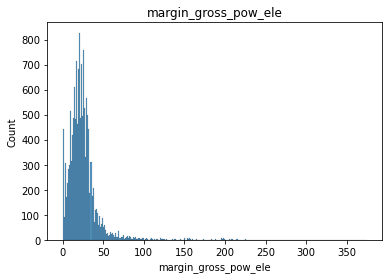

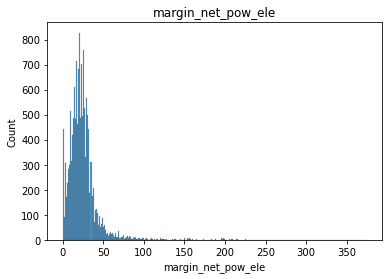

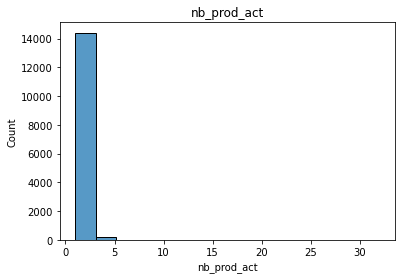

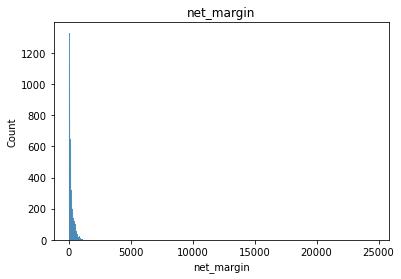

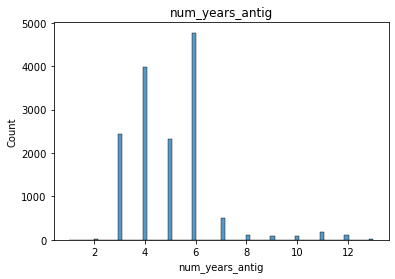

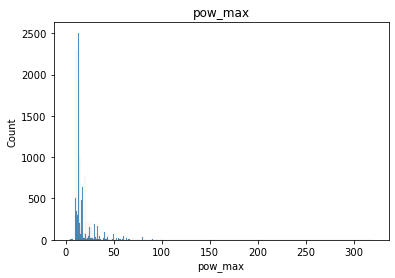

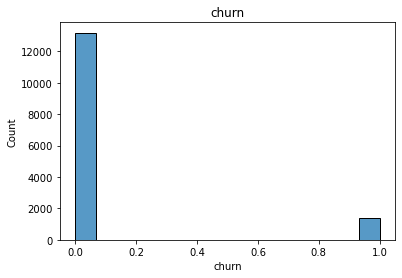

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# select only columns with numerical data types
# The select_dtypes method with the parameter include=[np.number] selects all columns with numeric data types, which includes both float and int.
numerical_cols = client_data.select_dtypes(include=[np.number]).columns.tolist()

# plot histograms for each numerical column
for col in numerical_cols:
    plt.figure()
    sns.histplot(data=client_data[col], kde=False)
    plt.title(col)
    plt.show()

Overall churn rate: 9.72%


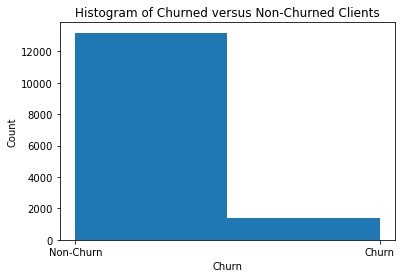

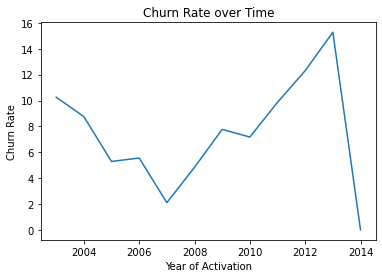

In [34]:
# Calculate the overall churn rate
churn_rate = (client_data['churn'].value_counts()[1] / len(client_data)) * 100
print('Overall churn rate: {:.2f}%'.format(churn_rate))

# Convert date columns to datetime format
date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
client_data[date_cols] = client_data[date_cols].apply(pd.to_datetime)

# Create a new column for the year of activation
client_data['year_activ'] = client_data['date_activ'].dt.year

# Create a histogram of churned versus non-churned clients
plt.hist(client_data['churn'], bins=2)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0,1], ['Non-Churn', 'Churn'])
plt.title('Histogram of Churned versus Non-Churned Clients')
plt.show()

# Create a line plot of churn rate over time
churn_by_year = client_data.groupby('year_activ')['churn'].mean() * 100
plt.plot(churn_by_year.index, churn_by_year.values)
plt.xlabel('Year of Activation')
plt.ylabel('Churn Rate')
plt.title('Churn Rate over Time')
plt.show()

Text(0, 0.5, 'Churn')

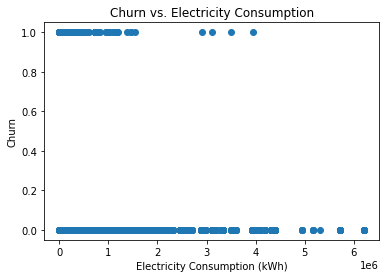

In [35]:
# Create a scatter plot of churn vs. electricity consumption
plt.scatter(client_data['cons_12m'], client_data['churn'])

# Set the chart title and labels
plt.title('Churn vs. Electricity Consumption')
plt.xlabel('Electricity Consumption (kWh)')
plt.ylabel('Churn')


In [39]:
import scipy.stats as stats

# Create a contingency table of churn and electricity consumption
cont_table = pd.crosstab(index=client_data['churn'], columns=pd.cut(client_data['cons_12m'], bins=[0, 2, 4, 6, 8, 10]))

# Print the contingency table
print(cont_table)

# Perform the chi-square test for independence
chi2, p, dof, expected = stats.chi2_contingency(cont_table)

# Print the test statistic and p-value
print('Chi-square test statistic:', chi2)
print('p-value:', p)


cons_12m  (0, 2]  (2, 4]  (4, 6]  (6, 8]  (8, 10]
churn                                            
0              4       5       3       3        5
1              0       1       0       0        1
Chi-square test statistic: 1.8333333333333337
p-value: 0.7663785041609573


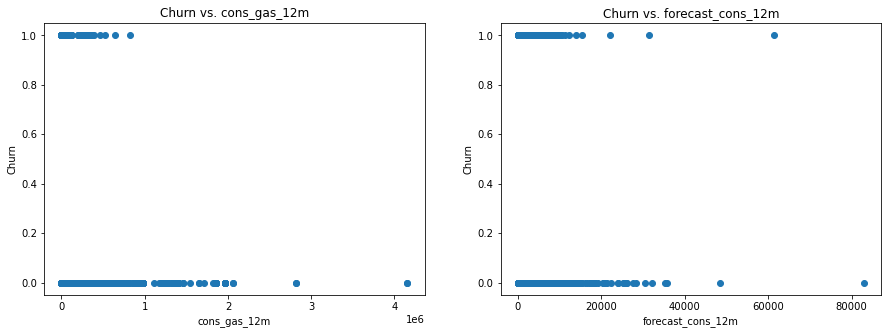

In [48]:
# Create a list of column names to plot
columns_to_plot = ['cons_gas_12m','forecast_cons_12m']

# Set up the subplots
fig, axs = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# Create scatter plots for each column
for i, col in enumerate(columns_to_plot):
    axs[i].scatter(client_data[col], client_data['churn'])
    axs[i].set_title('Churn vs. ' + col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Churn')

# Show the plot
plt.show()


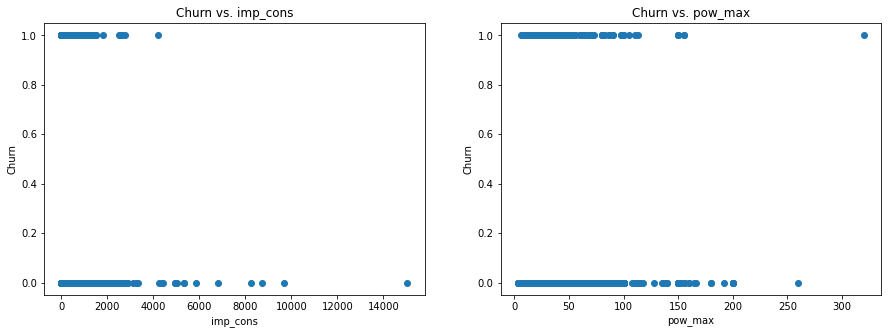

In [49]:
# Create a list of column names to plot
columns_to_plot = ['imp_cons', 'pow_max']

# Set up the subplots
fig, axs = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# Create scatter plots for each column
for i, col in enumerate(columns_to_plot):
    axs[i].scatter(client_data[col], client_data['churn'])
    axs[i].set_title('Churn vs. ' + col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Churn')

# Show the plot
plt.show()


In [51]:
import pandas as pd
import scipy.stats as stats

# Define the columns to analyze
columns = ['cons_gas_12m','forecast_cons_12m','imp_cons', 'pow_max','channel_sales', 'origin_up', 'has_gas']

# Loop over the columns and perform chi-square tests for independence
for column in columns:
    # Create a contingency table of churn and the current column
    cont_table = pd.crosstab(index=client_data['churn'], columns=client_data[column])

    # Print the contingency table
    print(f"Contingency table for {column}:")
    print(cont_table)

    # Perform the chi-square test for independence
    chi2, p, dof, expected = stats.chi2_contingency(cont_table)

    # Print the test statistic and p-value
    print('Chi-square test statistic:', chi2)
    print('p-value:', p)
    print('\n')

Contingency table for cons_gas_12m:
cons_gas_12m  0        11       12       21       32       35       36       \
churn                                                                         
0               10796        7        2        2        1        1        1   
1                1198        0        0        0        0        1        0   

cons_gas_12m  41       43       46       ...  1542867  1653924  1711930  \
churn                                    ...                              
0                   1        1        1  ...        1        2        1   
1                   0        1        0  ...        0        0        0   

cons_gas_12m  1813943  1859491  1860052  1959386  2055098  2813019  4154590  
churn                                                                        
0                   1        3        4       18        2        2        2  
1                   0        0        0        0        0        0        0  

[2 rows x 2112 columns]
Chi-squar

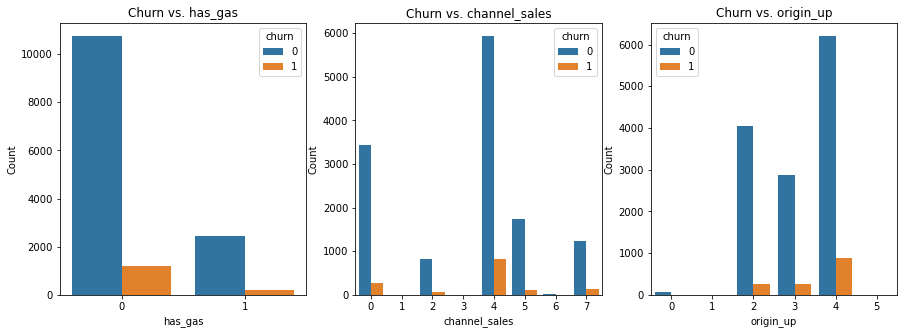

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the data
client_data = pd.read_csv('client_data.csv')

# Encode the categorical columns
encoder = LabelEncoder()
client_data['has_gas'] = encoder.fit_transform(client_data['has_gas'])
client_data['channel_sales'] = encoder.fit_transform(client_data['channel_sales'])
client_data['origin_up'] = encoder.fit_transform(client_data['origin_up'])

# Create a list of column names to plot
columns_to_plot = ['has_gas', 'channel_sales', 'origin_up']

# Set up the subplots
fig, axs = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

# Create count plots for each column
for i, col in enumerate(columns_to_plot):
    sns.countplot(x=col, hue='churn', data=client_data, ax=axs[i])
    axs[i].set_title('Churn vs. ' + col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')

# Show the plot
plt.show()


In [60]:
import pandas as pd
import scipy.stats as stats

# Define the columns to analyze
columns = ['has_gas', 'channel_sales', 'origin_up']

# Loop over the columns and perform chi-square tests for independence
for column in columns:
    # Create a contingency table of churn and the current column
    cont_table = pd.crosstab(index=client_data['churn'], columns=client_data[column])

    # Print the contingency table
    print(f"Contingency table for {column}:")
    print(cont_table)

    # Perform the chi-square test for independence
    chi2, p, dof, expected = stats.chi2_contingency(cont_table)

    # Print the test statistic and p-value
    print('Chi-square test statistic:', chi2)
    print('p-value:', p)
    print('\n')

Contingency table for has_gas:
has_gas      0     1
churn               
0        10753  2434
1         1202   217
Chi-square test statistic: 8.427560236804363
p-value: 0.0036957589641509795


Contingency table for channel_sales:
channel_sales     0  1    2  3     4     5   6     7
churn                                               
0              3442  3  818  2  5934  1740  11  1237
1               283  0   75  0   820   103   0   138
Chi-square test statistic: 103.78449544353441
p-value: 1.7810651262162043e-19


Contingency table for origin_up:
origin_up   0  1     2     3     4  5
churn                                
0          60  1  4036  2884  6204  2
1           4  0   258   264   893  0
Chi-square test statistic: 141.33713847702623
p-value: 9.298626414308622e-29




Contingency table for has_gas (proportions):
has_gas         0         1
churn                      
0        0.815424  0.184576
1        0.847075  0.152925
Chi-square test statistic: 8.427560236804363
p-value: 0.0036957589641509795




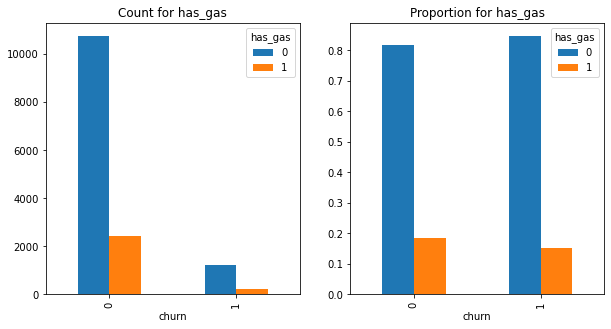

Contingency table for channel_sales (proportions):
channel_sales         0         1         2         3         4         5  \
churn                                                                       
0              0.261015  0.000227  0.062031  0.000152  0.449989  0.131948   
1              0.199436  0.000000  0.052854  0.000000  0.577872  0.072586   

channel_sales         6         7  
churn                              
0              0.000834  0.093805  
1              0.000000  0.097252  
Chi-square test statistic: 103.78449544353441
p-value: 1.7810651262162043e-19




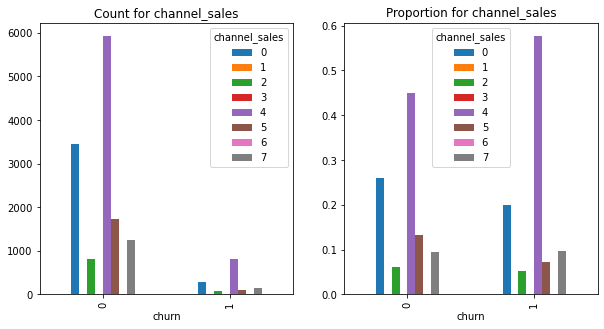

Contingency table for origin_up (proportions):
origin_up         0         1         2         3         4         5
churn                                                                
0          0.004550  0.000076  0.306059  0.218700  0.470463  0.000152
1          0.002819  0.000000  0.181818  0.186047  0.629316  0.000000
Chi-square test statistic: 141.33713847702623
p-value: 9.298626414308622e-29




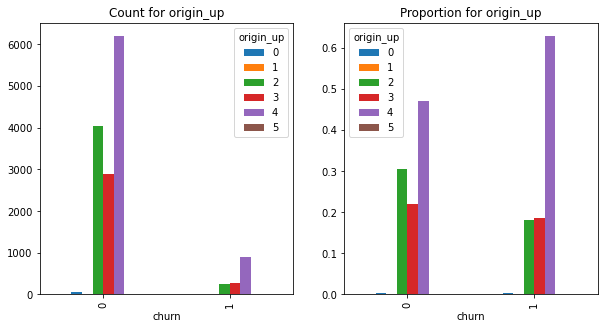

In [65]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define the columns to analyze
columns = ['has_gas', 'channel_sales', 'origin_up']

# Loop over the columns and perform chi-square tests for independence
for column in columns:
    # Create a contingency table of churn and the current column
    cont_table = pd.crosstab(index=client_data['churn'], columns=client_data[column])

    # Get the total counts for each row
    row_totals = cont_table.sum(axis=1)

    # Divide each cell in the table by the corresponding row total
    prop_table = cont_table.div(row_totals, axis=0)

    # Print the contingency table with proportions
    print(f"Contingency table for {column} (proportions):")
    print(prop_table)

    # Set up subplots for count and proportion charts
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

    # Generate count chart
    cont_table.plot(kind='bar', ax=ax1)
    ax1.set_title(f"Count for {column}")

    # Generate proportion chart
    prop_table.plot(kind='bar', ax=ax2)
    ax2.set_title(f"Proportion for {column}")

    # Perform the chi-square test for independence
    chi2, p, dof, expected = stats.chi2_contingency(cont_table)

    # Print the test statistic and p-value
    print('Chi-square test statistic:', chi2)
    print('p-value:', p)
    print('\n')

    # Show the charts
    plt.show()


Feature engineering

In [81]:
# Total consumption over the past year:
client_data['total_consumption'] = client_data['cons_12m'] + client_data['cons_gas_12m']


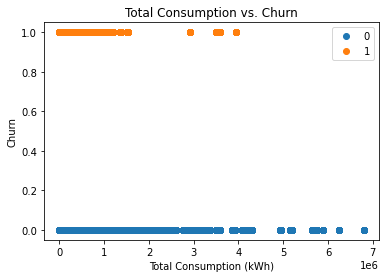

In [82]:
# Group the data by churn status
grouped_data = client_data.groupby('churn')

# Plot the total consumption for churned and non-churned clients
for name, group in grouped_data:
    plt.plot(group['total_consumption'], group['churn'], marker='o', linestyle='', label=name)

# Add axis labels and title for total consumption plot
plt.xlabel('Total Consumption (kWh)')
plt.ylabel('Churn')
plt.title('Total Consumption vs. Churn')

# Add a legend for total consumption plot
plt.legend()

# Show the total consumption plot
plt.show()



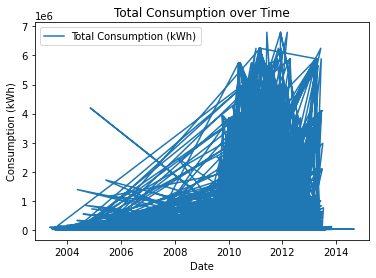

In [83]:
# plot the total consumption with time:
# Convert date columns to datetime format
client_data['date_activ'] = pd.to_datetime(client_data['date_activ'])
# Plot total consumption and total forecasted consumption with time
plt.plot(client_data['date_activ'], client_data['total_consumption'], label='Total Consumption (kWh)')
# Add axis labels and title
plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')
plt.title('Total Consumption over Time')

# Add a legend
plt.legend()

# Show the plot
plt.show()

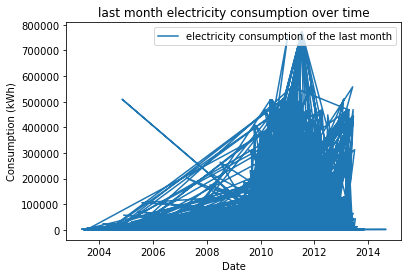

In [84]:

# plot the total consumption with time:
# Convert date columns to datetime format
client_data['date_activ'] = pd.to_datetime(client_data['date_activ'])
# Plot total consumption and total forecasted consumption with time
plt.plot(client_data['date_activ'], client_data['cons_last_month'], label='electricity consumption of the last month')
# Add axis labels and title
plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')
plt.title('last month electricity consumption over time')

# Add a legend
plt.legend()

# Show the plot
plt.show()


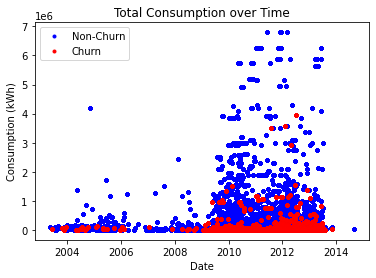

In [87]:
# Convert date columns to datetime format
client_data['date_activ'] = pd.to_datetime(client_data['date_activ'])

# Separate churn and non-churn data
churn_data = client_data[client_data['churn']==1]
non_churn_data = client_data[client_data['churn']==0]

# Plot total consumption for non-churn data
plt.plot(non_churn_data['date_activ'], non_churn_data['total_consumption'], 'b.', label='Non-Churn')
# Plot total consumption for churn data
plt.plot(churn_data['date_activ'], churn_data['total_consumption'], 'r.', label='Churn')

# Add axis labels and title
plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')
plt.title('Total Consumption over Time')

# Add a legend
plt.legend()

# Show the plot
plt.show()


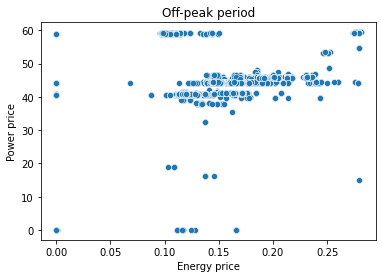

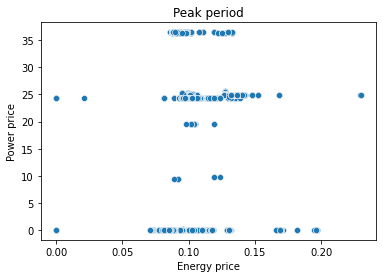

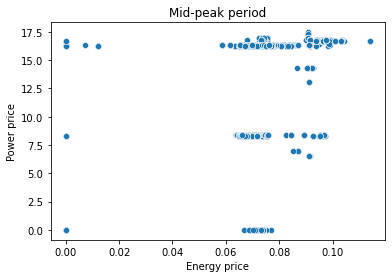

In [97]:
# Scatter plot of energy and power prices for each period
sns.scatterplot(x='price_off_peak_var', y='price_off_peak_fix', data=price_data)
plt.title('Off-peak period')
plt.xlabel('Energy price')
plt.ylabel('Power price')
plt.show()

sns.scatterplot(x='price_peak_var', y='price_peak_fix', data=price_data)
plt.title('Peak period')
plt.xlabel('Energy price')
plt.ylabel('Power price')
plt.show()

sns.scatterplot(x='price_mid_peak_var', y='price_mid_peak_fix', data=price_data)
plt.title('Mid-peak period')
plt.xlabel('Energy price')
plt.ylabel('Power price')
plt.show()
